**R.S.HARIHARAN
COLLABORATIVE FILTERING BASED RECOMMENDED SYSTEM**

**Importing the Libraries (numpy, panda, seaborn, matplotlib)**

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

**Reading the Ratings.csv File which has data of movie ratings**

In [17]:
ratings_cols = ['UserID','MovieID','Rating','Timestamp']
ratings = pd.read_csv('ratings.csv', encoding='latin-1',names=ratings_cols)
print ('Shape of ratings:{}'.format(ratings.shape))
ratings = ratings.drop('Timestamp',axis=1)
ratings.head(10)

Shape of ratings:(100836, 4)


,UserID,MovieID,Rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
5,1,70,3.0
6,1,101,5.0
7,1,110,4.0
8,1,151,5.0
9,1,157,5.0


**Reading the tags.csv file which has the data of users**

In [18]:
users_cols = ['UserID','Gender','Age','Occupation','Zip_code']
users = pd.read_csv('tags.csv', encoding='latin-1',names=users_cols)
print ('Shape of users:{}'.format(users.shape))
users.head(10)

Shape of users:(3684, 5)


,UserID,Gender,Age,Occupation,Zip_code
0,userId,movieId,tag,timestamp,NaN
1,2,60756,funny,1445714994,NaN
2,2,60756,Highly quotable,1445714996,NaN
3,2,60756,will ferrell,1445714992,NaN
4,2,89774,Boxing story,1445715207,NaN
5,2,89774,MMA,1445715200,NaN
6,2,89774,Tom Hardy,1445715205,NaN
7,2,106782,drugs,1445715054,NaN
8,2,106782,Leonardo DiCaprio,1445715051,NaN
9,2,106782,Martin Scorsese,1445715056,NaN


**Replacing The values In column gender,age,occupation OF tags.csv to custom values**

In [15]:
users['Gender'].replace({'F':0,'M':1},inplace=True)
users['Age'].replace({1: "Under 18",18: "18-24",25: "25-34",35: "35-44",45: "45-49",50: "50-55",56: "56+"},inplace=True)
users['Occupation'].replace({0: "other or not specified",1: "academic/educator",2: "artist",\
                             3: "clerical/admin",4: "college/grad student",5: "customer service",\
                             6: "doctor/health care",7: "executive/managerial",8: "farmer",\
                             9: "homemaker",10: "K-12 student",11: "lawyer",12: "programmer",\
                             13: "retired",14: "sales/marketing",15: "scientist",16: "self-employed",\
                             17: "technician/engineer",18: "tradesman/craftsman",19: "unemployed",20: "writer"},inplace=True)
users.head()

,UserID,Gender,Age,Occupation,Zip_code
0,userId,movieId,tag,timestamp,NaN
1,2,60756,funny,1445714994,NaN
2,2,60756,Highly quotable,1445714996,NaN
3,2,60756,will ferrell,1445714992,NaN
4,2,89774,Boxing story,1445715207,NaN


**Reading the movies.csv file that had data of movies with their genres**

In [19]:
movies_cols = ['MovieID','Title','Genres']
movies = pd.read_csv('movies.csv',names=movies_cols)
print ('Shape of movies:{}'.format(movies.shape))
movies.head()

Shape of movies:(9742, 3)


,MovieID,Title,Genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


**Plotting graph against rating and no. of movies with that rating**

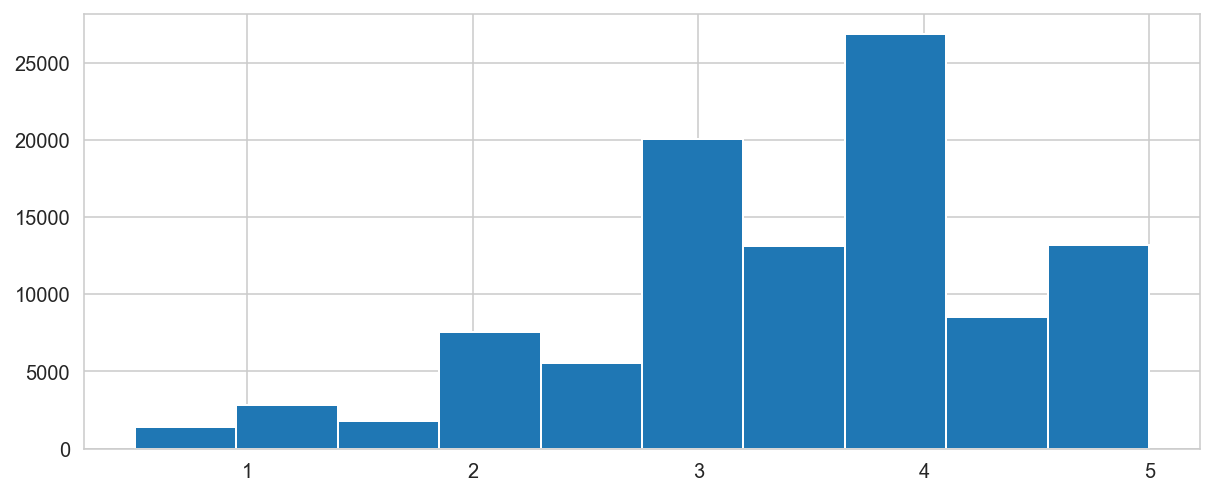

In [18]:
plt.figure(figsize=(10,4))
ratings['Rating'].hist(bins=10);

**Merging ratings and movies data frame with "MovieID" as their common key**

In [20]:
ratings.MovieID.astype(int)
movies.MovieID.astype(int)
df = ratings.merge(movies,on='MovieID')
df.head(6)

,UserID,MovieID,Rating,Title,Genres
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
5,18,1,3.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


**Grouping the Movies based on their rating mean in descending order**

In [38]:
df.groupby('Title')['Rating'].mean().sort_values(ascending=False).head()

Title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
Name: Rating, dtype: float64

**Grouping the Movies based on their rating count in descending order**

In [39]:
df.groupby('Title')['Rating'].count().sort_values(ascending=False).head()

Title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: Rating, dtype: int64

**Grouping the Movies based on their rating mean and storing in grading**

In [21]:
grading = pd.DataFrame(df.groupby('Title')['Rating'].mean())
grading.head()

,Rating
Title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


**Adding rating count column to the grading data frame**

In [22]:
grading['num of ratings'] = pd.DataFrame(df.groupby('Title')['Rating'].count())
grading.head()

,Rating,num of ratings
Title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


**Visualizing number of rating with help of Histogram**

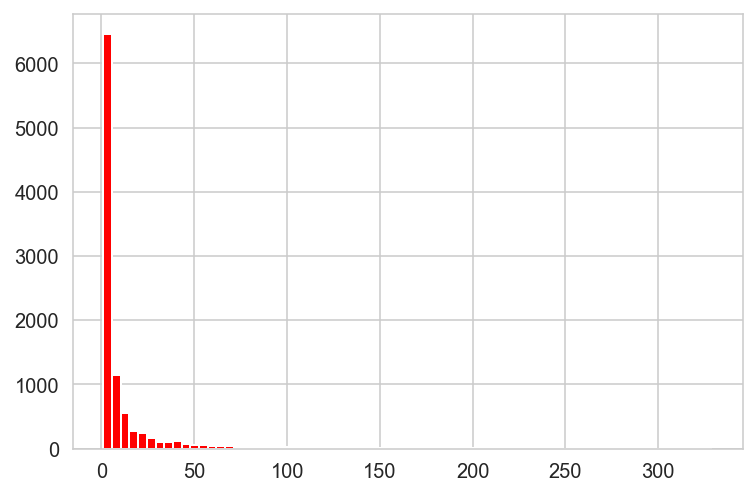

In [24]:
grading['num of ratings'].hist(bins=70,color='red');

**VISUALIZING RATING VS NUMBER OF RATING IN SCATTER PLOT**

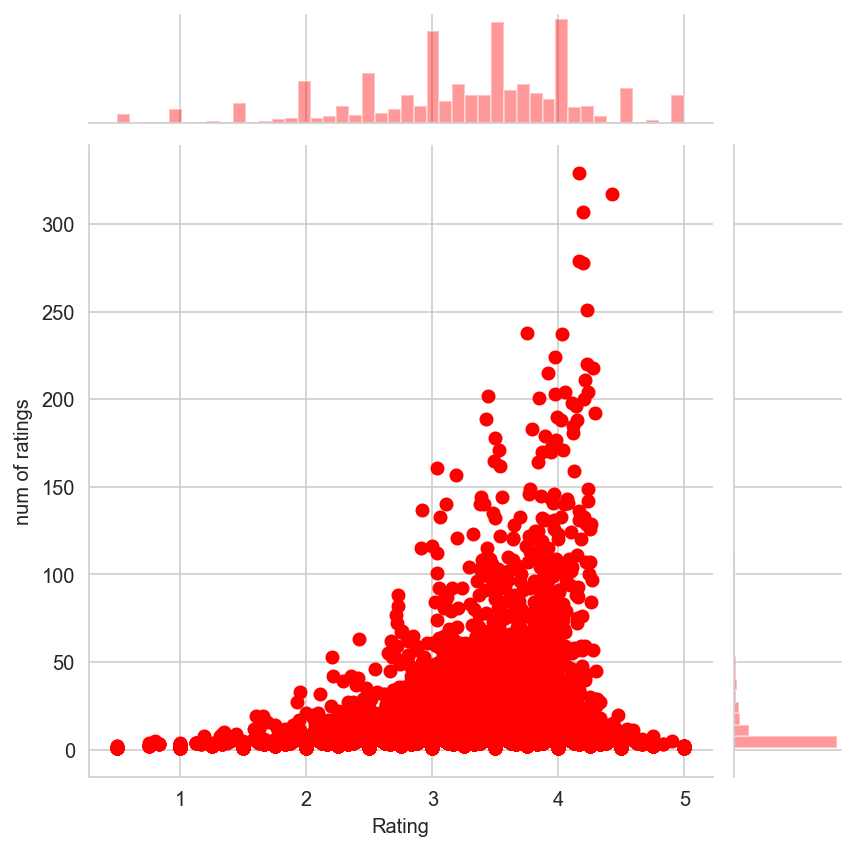

In [23]:
sns.jointplot(x='Rating',y='num of ratings',data=grading,color="red");

****Recommended System – COLLABORATIVE FILTERING.****

**Fill NaN values in user_id and movie_id column with 0**

In [25]:
ratings['UserID'] = ratings['UserID'].fillna(0)
ratings['MovieID'] = ratings['MovieID'].fillna(0)

**Replace NaN values in rating column with average of all values**

In [0]:
ratings['Rating'] = ratings['Rating'].fillna(ratings['Rating'].mean())

**Randomly sample 5% of the ratings dataset**

In [26]:
sample_subset = ratings.sample(frac=0.02)
print(sample_subset.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2017 entries, 41535 to 66790
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   UserID   2017 non-null   int64  
 1   MovieID  2017 non-null   int64  
 2   Rating   2017 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 63.0 KB
None


**Splitting data set into test set and train set**

In [28]:
from sklearn import model_selection as cv
train_data, test_data = cv.train_test_split(sample_subset, test_size=0.2)

**Creating two user-item matrices, one for training and another for testing**

In [39]:
train_data_matrix = train_data.as_matrix(columns = ['UserID', 'MovieID', 'Rating'])
test_data_matrix = test_data.as_matrix(columns = ['UserID', 'MovieID', 'Rating'])
print(train_data_matrix.shape)
print(test_data_matrix.shape)


(16003L, 3L)
(4001L, 3L)


**Defining USER Similarity Matrix**

In [30]:
from sklearn.metrics.pairwise import pairwise_distances
user_similarity = 1 - pairwise_distances(train_data, metric='cosine')
user_similarity[np.isnan(user_similarity)] = 0

**Defining ITEM Similarity Matrix**

In [40]:
item_similarity = 1 - pairwise_distances(train_data_matrix.T, metric='cosine')
item_similarity[np.isnan(item_similarity)] = 0

**Defining the predict function that learns from train set to predict for test sets based on item and user separately**

In [32]:
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis]) 
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])     
    return pred


**MAKING USER AND ITEM BASED PREDICTIONS FOR THE TEST SET**

In [41]:
item_prediction = predict(train_data_matrix, item_similarity, type='item')
user_prediction = predict(train_data_matrix, user_similarity, type='user')

**RESULT OF ITEM PREDICTION**

In [42]:
item_prediction

array([[2768.52070261, 2670.86677059, 2494.94409783],
       [ 773.15778099, 1039.05321108,  818.72474395],
       [1676.54959733, 1826.10630662, 1597.78076906],
       ...,
       [ 932.21806843,  703.91449565,  759.31064515],
       [ 980.70925759, 1151.90326971,  969.47368532],
       [2264.20690296, 1983.07318932, 1956.79057361]])


**RESULT OF USER PREDICTION**

In [43]:
user_prediction

array([[4103.60166794, 2885.2132994 , 1015.18503266],
       [1745.0812232 , 1591.39275333, -671.47397653],
       [2969.42196976, 2089.18656345,   94.39146679],
       ...,
       [2536.1026888 ,  770.51173869, -897.61442749],
       [2167.90415041, 1525.89398481, -556.79813522],
       [3647.05275102, 2193.62730022,  410.31994876]])


**Evaluation of Collaborative Filtering based Recommendation System**

**DEFINING FUNCTION TO CALL ROOT MEAN SQUARED ERROR**

In [36]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def rmse(pred, actual):
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return sqrt(mean_squared_error(pred, actual))

**ROOT MEAN SQUARED ERROR ON TRAIN SET**

In [44]:
print('User-based CF RMSE: ' + str(rmse(user_prediction, train_data_matrix)))
print('Item-based CF RMSE: ' + str(rmse(item_prediction, train_data_matrix)))

User-based CF RMSE: 847.299681701
Item-based CF RMSE: 1462.40810708


**ROOT MEAN SQUARED ERROR ON TEST SET**

In [45]:
print('User-based CF RMSE: ' + str(rmse(user_prediction, test_data_matrix)))
print('Item-based CF RMSE: ' + str(rmse(item_prediction, test_data_matrix)))

User-based CF RMSE: 1374.01652881
Item-based CF RMSE: 1794.38907398


**HENCE, WE BUILD THE COLLABORATIVE FILTERING RECOMMENDATION SYSTEM FOR MOVIE RECOMMENDATION**